<a href="https://colab.research.google.com/github/nidhi2399/deep-learning/blob/main/DeepLearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Registration no.: 20MAI0020
import numpy as np

In [ ]:
values = ([2,3],[5,6],[8,9])
print("Training input values without Bias\n", values)

Training input values without Bias
 ([2, 3], [5, 6], [8, 9])


In [ ]:
#Adding Bias to the input
x = [[-1]] * len(values)
values = np.concatenate((x, values), axis = 1)  
print("Training input values with bias in it\n",values)

Training input values with bias in it
 [[-1  2  3]
 [-1  5  6]
 [-1  8  9]]


In [ ]:
#random weights
m=3     #number of elements in each row of inputs
n=1 
weights = np.random.rand(m,n)*0.1 - 0.5
print("Initial random weights\n",weights)

Initial random weights
 [[-0.46451091]
 [-0.47875712]
 [-0.41586174]]


In [ ]:
#Target value
final = ([0],[1],[1])
print("Training data target values are\n", final)

Training data target values are
 ([0], [1], [1])


In [ ]:
#Method for updating weights
def updateWeights(weights, inputs, activation, targets):
    eta = 0.25
    weights += eta*np.dot(np.transpose(inputs), targets - activation)
    return weights

In [ ]:
#Creating Methods for Learning
def  prediction (inputs, weights, targets):
    #representing Activation function with 'ack [[]]' variable
    ack = [[0]] * len(inputs)
    for i in range(0, len(inputs)):    
        for j in range(0,len(weights)):
            ack[i] += inputs[i][j] * weights[j]
        ack[i] = np.where(ack[i]>0, 1, 0)
        #checking values with target
        if(targets[i] != ack[i]):
            weights = updateWeights(weights, inputs, ack[i], targets)
        print(ack[i])
    return weights

In [ ]:
#Training
iterations = 5
for temp in range(0, iterations):
    print("\nIteration-",temp+1)
    weights = prediction(values, weights, final)
    
print("\nTrained Weights\n", weights)


Iteration- 1
[0]
[0]
[1]

Iteration- 2
[1]
[1]
[1]

Iteration- 3
[1]
[1]
[1]

Iteration- 4
[1]
[1]
[1]

Iteration- 5
[1]
[1]
[1]

Trained Weights
 [[0.03548909]
 [0.77124288]
 [0.33413826]]


In [ ]:
#Testing
def perceptronPredict(weights, newInput):
    ac = np.dot(newInput, weights)
    ac = np.where(ac>0, 1, 0)
    print(ac)


newInput = ([-1.0, 7, 8])
perceptronPredict(weights, newInput)

[1]


In [ ]:
#question 2
import  numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
dataset =pd.read_csv("/content/drive/MyDrive/loan.csv")

In [ ]:
dataset.shape

(10000, 14)

In [ ]:
dataset.head()

,customer_id,disbursed_amount,interest,market,employment,time_employed,householder,income,date_issued,target,loan_purpose,number_open_accounts,date_last_payment,number_credit_lines_12
0,0,23201.5,15.4840,C,Teacher,<=5 years,RENT,84600.0,2013-06-11,0,Debt consolidation,4.0,2016-01-14,NaN
1,1,7425.0,11.2032,B,Accountant,<=5 years,OWNER,102000.0,2014-05-08,0,Car purchase,13.0,2016-01-25,NaN
2,2,11150.0,8.5100,A,Statistician,<=5 years,RENT,69840.0,2013-10-26,0,Debt consolidation,8.0,2014-09-26,NaN
3,3,7600.0,5.8656,A,Other,<=5 years,RENT,100386.0,2015-08-20,0,Debt consolidation,20.0,2016-01-26,NaN
4,4,31960.0,18.7392,E,Bus driver,>5 years,RENT,95040.0,2014-07-22,0,Debt consolidation,14.0,2016-01-11,NaN


In [ ]:
dataset['date_issued_dt'] = pd.to_datetime(dataset['date_issued'])

In [ ]:
#Data cleaning
dataset['date_last_payment_dt'] = pd.to_datetime(dataset['date_last_payment'])

In [ ]:
dataset['year']= dataset['date_issued_dt'].dt.year

In [ ]:
dataset['month']= dataset['date_issued_dt'].dt.month

In [ ]:
dataset.head()

,customer_id,disbursed_amount,interest,market,employment,time_employed,householder,income,date_issued,target,loan_purpose,number_open_accounts,date_last_payment,number_credit_lines_12,date_issued_dt,date_last_payment_dt,year,month
0,0,23201.5,15.4840,C,Teacher,<=5 years,RENT,84600.0,2013-06-11,0,Debt consolidation,4.0,2016-01-14,NaN,2013-06-11,2016-01-14,2013,6
1,1,7425.0,11.2032,B,Accountant,<=5 years,OWNER,102000.0,2014-05-08,0,Car purchase,13.0,2016-01-25,NaN,2014-05-08,2016-01-25,2014,5
2,2,11150.0,8.5100,A,Statistician,<=5 years,RENT,69840.0,2013-10-26,0,Debt consolidation,8.0,2014-09-26,NaN,2013-10-26,2014-09-26,2013,10
3,3,7600.0,5.8656,A,Other,<=5 years,RENT,100386.0,2015-08-20,0,Debt consolidation,20.0,2016-01-26,NaN,2015-08-20,2016-01-26,2015,8
4,4,31960.0,18.7392,E,Bus driver,>5 years,RENT,95040.0,2014-07-22,0,Debt consolidation,14.0,2016-01-11,NaN,2014-07-22,2016-01-11,2014,7


In [ ]:
dataset.shape

(10000, 18)

In [ ]:
X=dataset.iloc[:, [0,1,2,7,11,16,17]].values
y=dataset.iloc[:,9].values

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size = 0.1, random_state =0)

In [ ]:
#Importing Perceptron
from sklearn.linear_model import Perceptron
per1=Perceptron(random_state=0)

In [ ]:
per1.fit(X_train,y_train)

Perceptron(alpha=0.0001, class_weight=None, early_stopping=False, eta0=1.0,
           fit_intercept=True, max_iter=1000, n_iter_no_change=5, n_jobs=None,
           penalty=None, random_state=0, shuffle=True, tol=0.001,
           validation_fraction=0.1, verbose=0, warm_start=False)

In [ ]:
pred1=per1.predict(X_test)

In [ ]:
#Checking for the accuracy
from sklearn.metrics import accuracy_score
print('Accuracy score')
accuracy_score(y_test,pred1)*100

Accuracy score


98.8

In [ ]:
#Train 80% Test 20%
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size = 0.2, random_state =0)

In [ ]:
from sklearn.linear_model import Perceptron
per2=Perceptron(random_state=0)

In [ ]:
per2.fit(X_train,y_train)
pred2=per2.predict(X_test)

In [ ]:
#Checking for the accuracy
from sklearn.metrics import accuracy_score
print('Accuracy score')
accuracy_score(y_test,pred2)*100

Accuracy score


99.1

In [ ]:
from sklearn.linear_model import Perceptron
per1=Perceptron(random_state=0)

In [ ]:
#question 3
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt

In [ ]:
img1 = cv.imread('/content/drive/MyDrive/pqr.png',1)

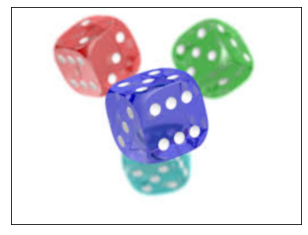

In [ ]:
plt.imshow(img1, cmap='gray', interpolation='bicubic')
plt.xticks([]), plt.yticks([])
plt.show()

In [ ]:
dimensions = img1.shape
 
# height, width, number of channels in image
height = img1.shape[0]
width = img1.shape[1]
channels = img1.shape[2]
 
print('Image Dimension    : ',dimensions)
print('Image Height       : ',height)
print('Image Width        : ',width)
print('Number of Channels : ',channels)


Image Dimension    :  (194, 259, 3)
Image Height       :  194
Image Width        :  259
Number of Channels :  3
